In [225]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from graphviz import Digraph
from graphviz import Graph

import numpy as np
import matplotlib.pyplot as plt
import mglearn
import graphviz

%matplotlib inline

In [226]:
cancer = load_breast_cancer()
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [227]:
print(cancer.feature_names)
print("\n Labels:")
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

 Labels:
['malignant' 'benign']


# KNN:

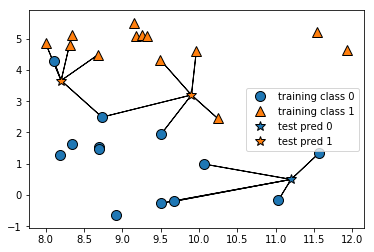

In [229]:
mglearn.plots.plot_knn_classification(n_neighbors = 5)
#Stars are the random samples, Blue circle represent malignant and Triangle represent benign
#Testing using KNN mostly because this is a smaller dataset eith fewer features

In [230]:
# Now I'll build/train the KNN classifier

In [311]:
#split dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 40)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [312]:
print('Accuracy of KNN n = 5,  on the training set: {:.3f}'.format(knn.score(X_train, Y_train)))
print('Accuracy of KNN n = 5,  on the test set: {:.3f}'.format(knn.score(X_test, Y_test)))

Accuracy of KNN n = 5,  on the training set: 0.937
Accuracy of KNN n = 5,  on the test set: 0.944


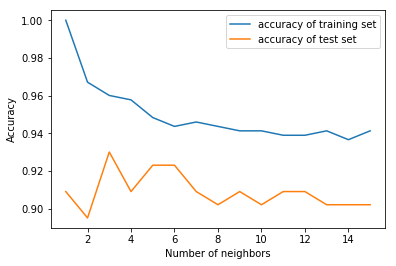

In [233]:
#Now I can optimize the KNN classifier to find the best N

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 60)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,16)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, Y_train)
    training_accuracy.append(clf.score(X_train, Y_train))
    test_accuracy.append(clf.score(X_test, Y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = 'accuracy of training set')
plt.plot(neighbors_settings, test_accuracy, label = 'accuracy of test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.legend()


In [234]:
#Using N = 3, or 6 we'll get the highest accuracy
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 40)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
print('Accuracy of KNN n = 3,  on the training set: {:.3f}'.format(knn.score(X_train, Y_train)))
print('Accuracy of KNN n = 3,  on the test set: {:.3f}'.format(knn.score(X_test, Y_test)))

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 40)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, Y_train)
print('\nAccuracy of KNN n = 6,  on the training set: {:.3f}'.format(knn.score(X_train, Y_train)))
print('Accuracy of KNN n = 6,  on the test set: {:.3f}'.format(knn.score(X_test, Y_test)))

Accuracy of KNN n = 3,  on the training set: 0.953
Accuracy of KNN n = 3,  on the test set: 0.923

Accuracy of KNN n = 6,  on the training set: 0.941
Accuracy of KNN n = 6,  on the test set: 0.937


In [267]:
print('Predicted probabilities for the samples (malignant and benign):\n\n{}'.format(knn.predict_proba(X_test[:20])))
knn.predict(X_test)

Predicted probabilities for the samples (malignant and benign):

[[ 0.66666667  0.33333333]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 0.33333333  0.66666667]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.16666667  0.83333333]
 [ 0.16666667  0.83333333]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 0.33333333  0.66666667]
 [ 1.          0.        ]]


array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0])

# SVM:

In [236]:
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 0)
svm = SVC()
svm.fit(X_train, Y_train)
print('accuracy on the training subset: {:.3f}'.format(svm.score(X_train, Y_train)))
print('accuracy on the test subset: {:.3f}'.format(svm.score(X_test, Y_test)))

accuracy on the training subset: 1.000
accuracy on the test subset: 0.629


I'm currently over fitting on the training set as well as poor preformance on the test, I need to fix the scaling of the cancer data

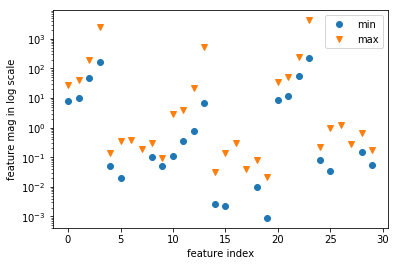

In [238]:
plt.plot(X_train.min(axis=0), 'o', label ='min')
plt.plot(X_train.max(axis=0), 'v', label ='max')
plt.xlabel('feature index')
plt.ylabel('feature mag in log scale')
plt.yscale('log')
plt.legend(loc = 'upper right')

I need to rescale the features, I need to bring the value of each sample into a similar range (too big of a difference between the min and max)

Minimum per feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Miximum per feature
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


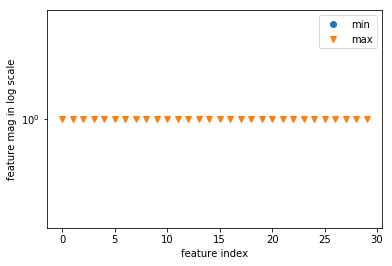

In [314]:
#I need to find the range
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis = 0)
X_train_scaled = (X_train - min_train)/range_train

print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Miximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

plt.plot(X_train_scaled.min(axis=0), 'o', label ='min')
plt.plot(X_train_scaled.max(axis=0), 'v', label ='max')
plt.xlabel('feature index')
plt.ylabel('feature mag in log scale')
plt.yscale('log')
plt.legend(loc = 'upper right')

In [241]:
X_test_scaled = (X_test - min_train)/range_train

svm = SVC()
svm.fit(X_train_scaled, Y_train)
print('accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, Y_train)))
print('accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, Y_test)))

accuracy on the training subset: 0.955
accuracy on the test subset: 0.951


#Much better preformance after scaling! but I need to adjust to prevent underfitting, I nedd to adjust the hyper-parameters, Both C and gamma control the complexity of the model so I should start there.

accuracy on the training subset: 0.986
accuracy on the test subset: 0.958

accuracy on the training subset: 0.991
accuracy on the test subset: 0.944

accuracy on the training subset: 0.993
accuracy on the test subset: 0.972

accuracy on the training subset: 1.000
accuracy on the test subset: 0.944

accuracy on the training subset: 1.000
accuracy on the test subset: 0.944



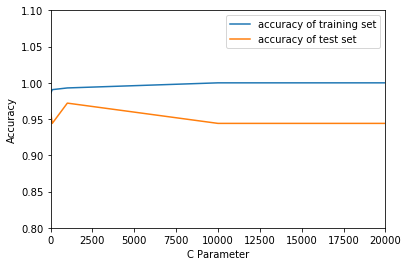

In [244]:
CParam = [10,100,1000,10000,100000]
training_accuracy2 = []
test_accuracy2 = []
xs = range(1,6)

for i in range(len(CParam)):
    svm = SVC(C=CParam[i])
    svm.fit(X_train_scaled, Y_train)
    training_accuracy2.append(svm.score(X_train_scaled, Y_train))
    test_accuracy2.append(svm.score(X_test_scaled, Y_test))
    print('accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, Y_train)))
    print('accuracy on the test subset: {:.3f}\n'.format(svm.score(X_test_scaled, Y_test)))
    
plt.plot(CParam, training_accuracy2, label = 'accuracy of training set')
plt.plot(CParam, test_accuracy2, label = 'accuracy of test set')
plt.ylabel('Accuracy')
plt.xlabel('C Parameter')
plt.axis([-1,20000,.8,1.1])
plt.legend()

Now I'm no longer under or overfitting, and C = 1000 is optimal

In [246]:
svm = SVC(1000)
svm.fit(X_train_scaled, Y_train)
print('accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, Y_train)))
print('accuracy on the test subset: {:.3f}\n'.format(svm.score(X_test_scaled, Y_test)))

accuracy on the training subset: 0.993
accuracy on the test subset: 0.972



In [321]:
print('decision function is:{}\n'.format(svm.decision_function(X_test)[:20]))
print('Thresholded decision function:\n{}'.format(svm.decision_function(X_test_scaled)[:20]>0))

svm = SVC(C=1000, probability=True)
svm.fit(X_train_scaled, Y_train)
print('Predicted probabilities for the samples (malignant and benign):\n\n{}'.format(svm.predict_proba(X_test_scaled[:20])))
svm.predict(X_test_scaled)

decision function is:[-3.86911725 -3.86911725 -3.86911725 -3.86911725 -3.86911725 -3.86911725
 -3.86911725 -3.86911725 -3.86911725 -3.86911725 -3.86911725 -3.86911725
 -3.86911725 -3.86911725 -3.86911725 -3.86911725 -3.86911725 -3.86911725
 -3.86911725 -3.86911725]

Thresholded decision function:
[ True False False  True False  True False False False  True False False
 False  True  True  True False False False False]
Predicted probabilities for the samples (malignant and benign):

[[  3.86105444e-01   6.13894556e-01]
 [  9.99999900e-01   1.00000010e-07]
 [  9.99999900e-01   1.00000010e-07]
 [  8.11512715e-02   9.18848728e-01]
 [  9.89040072e-01   1.09599276e-02]
 [  6.19560550e-02   9.38043945e-01]
 [  9.98990203e-01   1.00979728e-03]
 [  9.99999900e-01   1.00000010e-07]
 [  9.99999900e-01   1.00000010e-07]
 [  1.63183537e-05   9.99983682e-01]
 [  9.99999900e-01   1.00000010e-07]
 [  9.99999900e-01   1.00000010e-07]
 [  5.25782972e-01   4.74217028e-01]
 [  2.19997550e-07   9.99999780e-

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0])

# Decision Trees:

In [248]:
cancer = load_breast_cancer()

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 45)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, Y_train)

print('accuracy on the training subset: {:.3f}'.format(tree.score(X_train, Y_train)))
print('accuracy on the test subset: {:.3f}\n'.format(tree.score(X_test, Y_test)))

accuracy on the training subset: 1.000
accuracy on the test subset: 0.916



Clearly overfitting, im going to apply pre-pruning, to limit the number of decisions

In [250]:
tree = DecisionTreeClassifier(max_depth = 4,random_state=0)
tree.fit(X_train, Y_train)

print('accuracy on the training subset: {:.3f}'.format(tree.score(X_train, Y_train)))
print('accuracy on the test subset: {:.3f}\n'.format(tree.score(X_test, Y_test)))

accuracy on the training subset: 0.991
accuracy on the test subset: 0.937



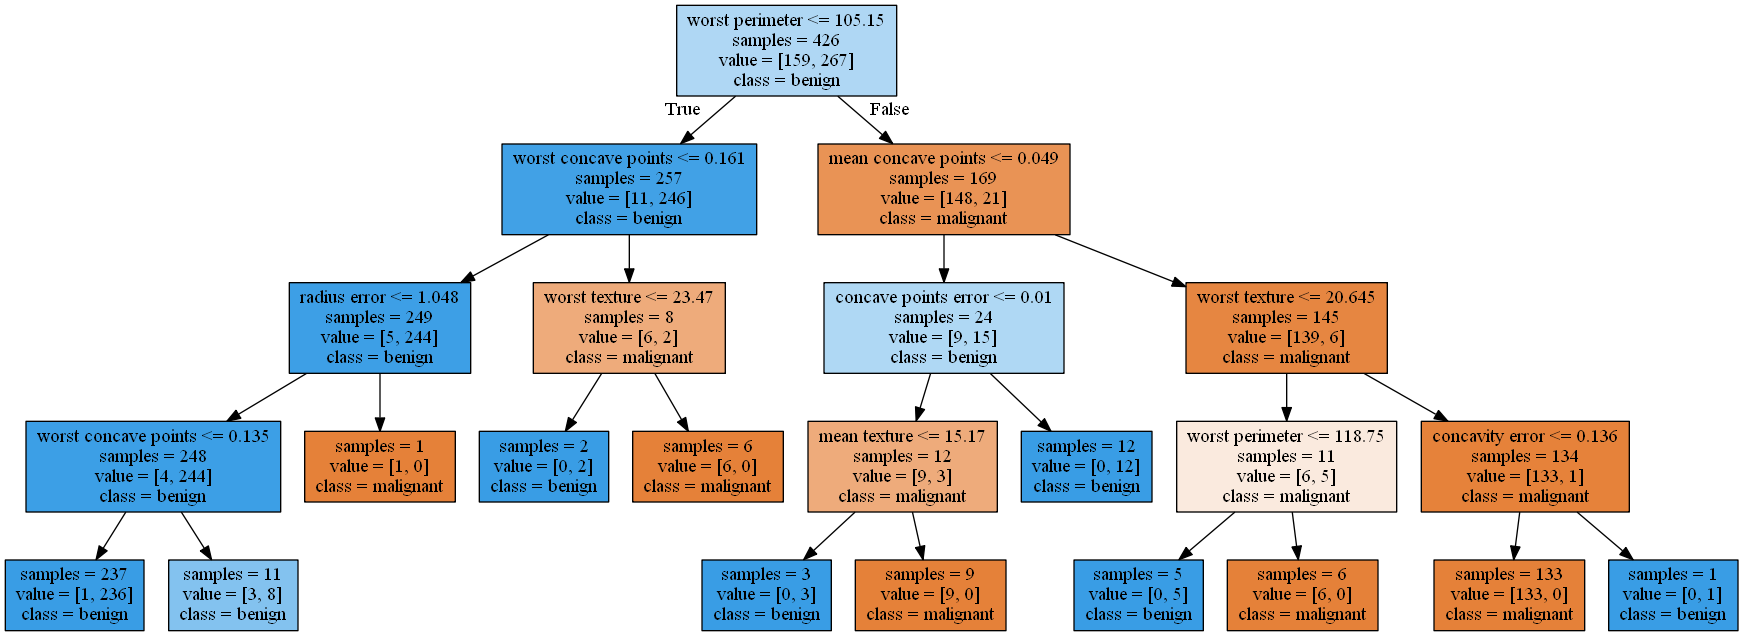

In [252]:
from IPython.display import Image
Image(filename='newtree.png')

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


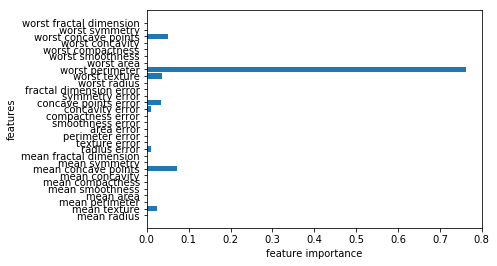

In [325]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('feature importance')
plt.ylabel('features')
plt.show
print(cancer.feature_names)


In [269]:
print('Predicted probabilities for the samples (malignant and benign):\n\n{}'.format(tree.predict_proba(X_test[:20])))
tree.predict(X_test)

Predicted probabilities for the samples (malignant and benign):

[[ 0.00421941  0.99578059]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.00421941  0.99578059]
 [ 1.          0.        ]
 [ 0.00421941  0.99578059]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.00421941  0.99578059]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.00421941  0.99578059]
 [ 0.          1.        ]
 [ 0.00421941  0.99578059]
 [ 0.00421941  0.99578059]
 [ 0.00421941  0.99578059]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]]


array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0])

# Nerual Network:

In [292]:
scaler = StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, Y_train)

print('accuracy on the training subset: {:.3f}'.format(mlp.score(X_train, Y_train)))
print('accuracy on the test subset: {:.3f}\n'.format(mlp.score(X_test, Y_test)))

accuracy on the training subset: 0.901
accuracy on the test subset: 0.902



Accuracy is underfitting, this may be due to the scaling again

In [294]:
print('max per each feature, for scaling:\n{}'.format(cancer.data.max(axis = 0)))


max per each feature, for scaling:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


I need to obtain a mean that is equal to 0 to 1

In [303]:
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

max_iter = [10,100,1000,10000,100000]

for i in range(len(max_iter)):
    mlp = MLPClassifier(max_iter=max_iter[i], random_state= 50)
    mlp.fit(X_train_scaled, Y_train)
    print('accuracy on the training subset: {:.3f}'.format(mlp.score(X_train_scaled, Y_train)))
    print('accuracy on the test subset: {:.3f}\n'.format(mlp.score(X_test_scaled, Y_test)))

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy on the training subset: 0.948
accuracy on the test subset: 0.930



C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy on the training subset: 0.993
accuracy on the test subset: 0.958

accuracy on the training subset: 0.995
accuracy on the test subset: 0.958

accuracy on the training subset: 0.995
accuracy on the test subset: 0.958

accuracy on the training subset: 0.995
accuracy on the test subset: 0.958



In [304]:
mlp = MLPClassifier(max_iter=1000,alpha=1,  random_state= 50)
mlp.fit(X_train_scaled, Y_train)
print('accuracy on the training subset: {:.3f}'.format(mlp.score(X_train_scaled, Y_train)))
print('accuracy on the test subset: {:.3f}\n'.format(mlp.score(X_test_scaled, Y_test)))

accuracy on the training subset: 0.991
accuracy on the test subset: 0.958



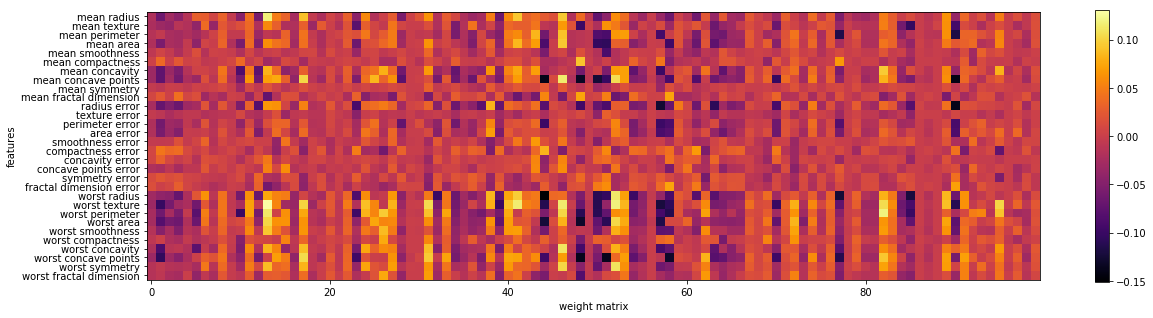

In [324]:
plt.figure(figsize = (20,5))
plt.imshow(mlp.coefs_[0], interpolation = 'none', cmap='inferno')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('weight matrix')
plt.ylabel('features')
plt.colorbar()

^
The columns are the number of hidden units, darker with more positive values and yellow with more negative. features with smaller weights in the hidden unit might be less important, this graph shows that the errors as well as mean smoothness, mean symmetry, as well as others don't have a major impact on the MLP decision making:


In [306]:
print('Predicted probabilities for the samples (malignant and benign):\n\n{}'.format(mlp.predict_proba(X_test_scaled[:20])))
mlp.predict(X_test_scaled)

Predicted probabilities for the samples (malignant and benign):

[[  9.34111805e-03   9.90658882e-01]
 [  9.97948451e-01   2.05154888e-03]
 [  9.92894424e-01   7.10557620e-03]
 [  2.41840987e-03   9.97581590e-01]
 [  9.82015920e-01   1.79840805e-02]
 [  2.57988572e-02   9.74201143e-01]
 [  9.99962617e-01   3.73827828e-05]
 [  9.99979794e-01   2.02062302e-05]
 [  9.97608450e-01   2.39155041e-03]
 [  4.51071088e-03   9.95489289e-01]
 [  9.99257781e-01   7.42219179e-04]
 [  9.99303934e-01   6.96065680e-04]
 [  6.79070867e-02   9.32092913e-01]
 [  1.88616707e-01   8.11383293e-01]
 [  1.81354521e-03   9.98186455e-01]
 [  6.81218846e-05   9.99931878e-01]
 [  1.16080129e-03   9.98839199e-01]
 [  8.96085097e-01   1.03914903e-01]
 [  4.30259031e-01   5.69740969e-01]
 [  9.62287919e-01   3.77120807e-02]]


array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0])